Implementacja PCA dla klasyfikacji

Wykorzystam:
    Pipeline do przetwarzania danych z zad.14.3
    PCA(n_components=k) do redukcji wymiarów,
    LogisticRegression jako bazowy model klasyfikacyjny.

Czy ten zbiór nadaje się do PCA ?
    TAK,ponieważ:
    Dane są numeryczne i zostały poddane standaryzacji.
    Można zastosować PCA do redukcji wymiarowości przed klasteryzacją, aby sprawdzić, czy poprawi jakość 
     grupowania.

Accuracy: 0.7867
F1-score: 0.6456

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      2000
           1       0.72      0.58      0.65      1000

    accuracy                           0.79      3000
   macro avg       0.77      0.74      0.75      3000
weighted avg       0.78      0.79      0.78      3000



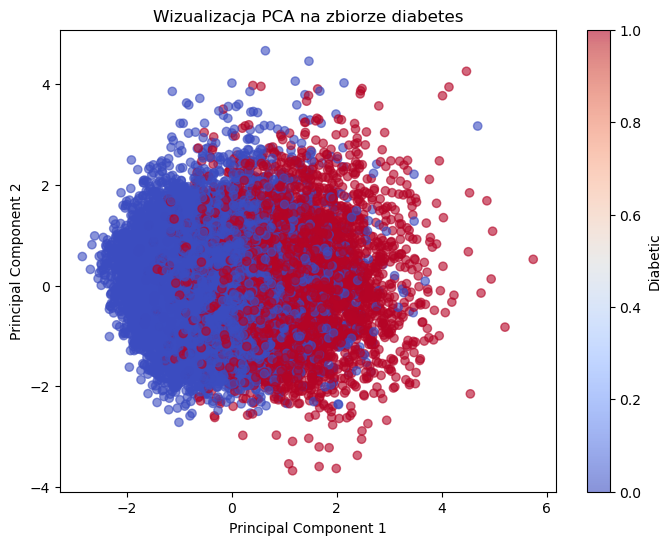

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Wczytanie danych
df = pd.read_csv('diabetes.csv')

# Definicja cech i etykiety
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness',
            'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
target = 'Diabetic'

X, y = df[features], df[target]

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# StandardScaler + PCA + Klasyfikator
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),  # Redukcja do 5 głównych komponentów
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Trenowanie modelu
pipeline.fit(X_train, y_train)

# Predykcja
y_pred = pipeline.predict(X_test)

# Ocena modelu
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'F1-score: {f1:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Wizualizacja PCA
pca = PCA(n_components=2)  # Redukcja do 2D dla wizualizacji
X_pca = pca.fit_transform(StandardScaler().fit_transform(X))

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Wizualizacja PCA na zbiorze diabetes')
plt.colorbar(label='Diabetic')
plt.show()


 Wyniki klasyfikacji po PCA (5 komponentów)
Accuracy: 0.7867 (~78.67%)
F1-score: 0.6456 (~64.56%)
Precision & Recall:
Klasa 0 (bez cukrzycy): 81% precyzja, 89% recall.
Klasa 1 (cukrzyca): 72% precyzja, 58% recall (gorsza skuteczność w wykrywaniu cukrzycy).

Co nam mówi wykres PCA?
Dane po redukcji do 2 wymiarów pokazują pewne nakładanie się klas.
Czerwone punkty (Diabetic = 1) i niebieskie punkty (Diabetic = 0) nie są wyraźnie rozdzielone, co może wpływać na wyniki modelu.
Możliwe ulepszenia:
Sprawdzić inne wartości n_components (np. 3, 4, 6).
Wypróbować inne modele (np. RandomForest, SVM).

 Implementacja PCA dla regresji
 
 Plan działania:
Wczytanie danych i podział na cechy (X) i zmienną docelową (y)- dane z zad.13.5
Standaryzacja danych (PCA działa najlepiej na znormalizowanych danych).
Redukcja wymiarowości za pomocą PCA.
Trening modelu regresji (wykorzystamy LinearRegression).
Ocena modelu (R², RMSE).
Wizualizacja wariancji wyjaśnionej przez PCA.
 

R^2 Score: 0.4353
RMSE: 469.0462


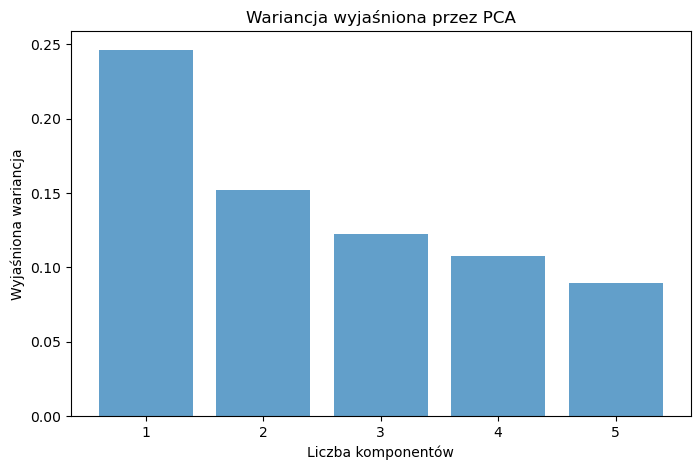

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('daily-bike-share.csv')

# Wybór cech i zmiennej docelowej
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
            'temp', 'atemp', 'hum', 'windspeed']
target = 'rentals'

X, y = data[features], data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA - redukcja wymiarowości
pca = PCA(n_components=5)  # Redukcja do 5 komponentów
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Trening modelu regresyjnego
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Predykcja
y_pred = model.predict(X_test_pca)

# Ocena modelu
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R^2 Score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

# Wizualizacja wariancji wyjaśnionej
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
plt.xlabel('Liczba komponentów')
plt.ylabel('Wyjaśniona wariancja')
plt.title('Wariancja wyjaśniona przez PCA')
plt.show()

Analiza wyników PCA dla regresji
 > Wyniki modelu regresji:
R² Score: 0.4353 → Model wyjaśnia 43,53% wariancji w danych.
RMSE: 469.0462 → Średni błąd predykcji to około 469 wypożyczeń.
 > Co mówi nam wykres PCA?
Pierwszy komponent wyjaśnia ~25% wariancji, co oznacza, że najbardziej wpływa na strukturę danych.
Dalsze komponenty mają coraz mniejszy wpływ – drugi wyjaśnia ~15%, a kolejne jeszcze mniej.
Wspólnie 5 komponentów nie wyjaśnia 100% wariancji, co może sugerować, że usunięto istotne informacje.

 Wnioski
 - PCA pozwoliło uprościć dane, ale nieco osłabiło dokładność modelu (R² = 0.43).
 - Warto sprawdzić więcej komponentów (np. n_components=8 lub więcej).
 - RMSE jest dość wysokie –  oznacza, że średni błąd predykcji wynosi około 469 wynajmów. 
    Możliwe jest:
        Model nie dopasowuje się dobrze do danych
        Model liniowy może nie być wystarczająco elastyczny, aby uchwycić wszystkie zależności w danych.
        Możliwe, że dane są nieliniowe, a LinearRegression nie radzi sobie dobrze.
        PCA mogło usunąć ważne informacje
        Być może 5 komponentów to za mało, przez co model traci kluczowe cechy.
        Warto sprawdzić więcej komponentów (np. 8-10) i zobaczyć, czy RMSE spadnie.
        Dane mogą być bardzo rozproszone (duża wariancja)
        Jeśli liczba wynajmów rowerów zmienia się bardzo dynamicznie w różnych dniach, RMSE będzie wyższe.